##Data Preparation Report

In [1]:
# import block
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

# load data
df = pd.read_csv("data.csv")

## Step 1: Exploratory Data Analysis (EDA)
[Dataset - Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [2]:
df.head()   # show first five entries

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.sample(10)   # get 10 random samples

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
408,90524101,M,17.990,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.08824,...,25.41,138.10,1349.0,0.1482,0.37350,0.33010,0.19740,0.3060,0.08503,NaN
220,8812816,B,13.650,13.16,87.88,568.9,0.09646,0.08711,0.038880,0.02563,...,16.35,99.71,706.2,0.1311,0.24740,0.17590,0.08056,0.2380,0.08718,NaN
204,87930,B,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.03821,...,24.64,96.05,677.9,0.1426,0.23780,0.26710,0.10150,0.3014,0.08750,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969,NaN
187,874373,B,11.710,17.19,74.68,420.3,0.09774,0.06141,0.038090,0.03239,...,21.39,84.42,521.5,0.1323,0.10400,0.15210,0.10990,0.2572,0.07097,NaN
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.03716,...,24.39,73.07,390.2,0.1301,0.29500,0.34860,0.09910,0.2614,0.11620,NaN
143,869224,B,12.900,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.03088,...,21.82,97.17,643.8,0.1312,0.25480,0.20900,0.10120,0.3549,0.08118,NaN
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.07064,...,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473,NaN
432,908194,M,20.180,19.54,133.80,1250.0,0.11330,0.14890,0.213300,0.12590,...,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075,NaN
419,906290,B,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,NaN


In [4]:
df.shape    # show the shape (width, height) of the dataset

(569, 33)

In [5]:
df.nunique()   # show the number of unique values in each column

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [6]:
df.info()   # show the attributes, their types, and the counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()   # show basic univariate statistics for numeric attributes for the dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


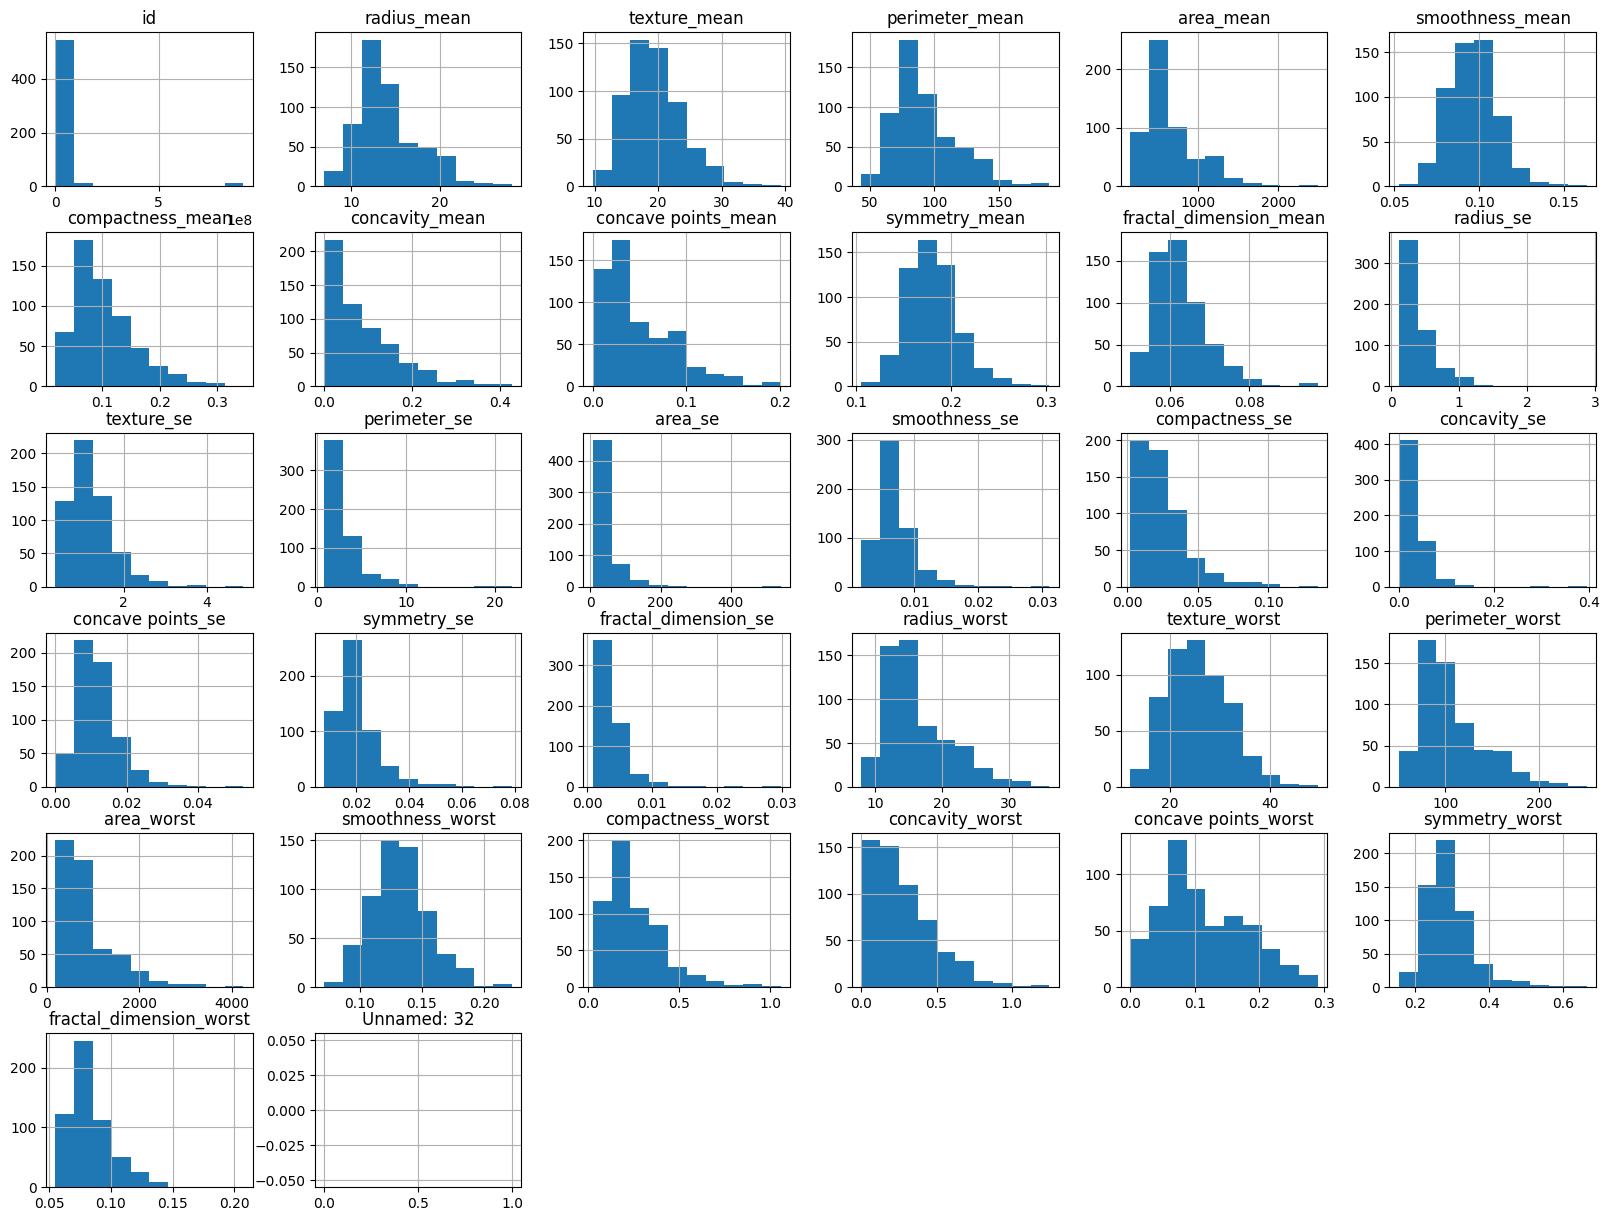

In [8]:
df.hist(figsize=(20, 15))
plt.show()

In [9]:
df['diagnosis'].value_counts()    # get the counts of how many were diagnosed as benign (B) / malignant (M)

,count
diagnosis,
B,357
M,212


In [10]:
df.isnull().sum()   # see count of missing values

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


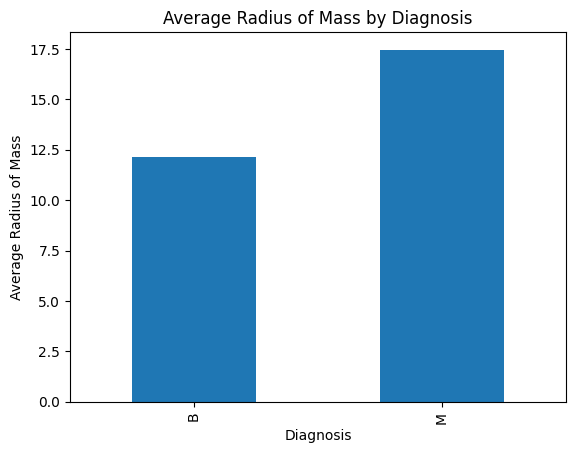

In [11]:
df.groupby('diagnosis')['radius_mean'].mean().plot(kind='bar')
plt.title("Average Radius of Mass by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Average Radius of Mass")
plt.show()

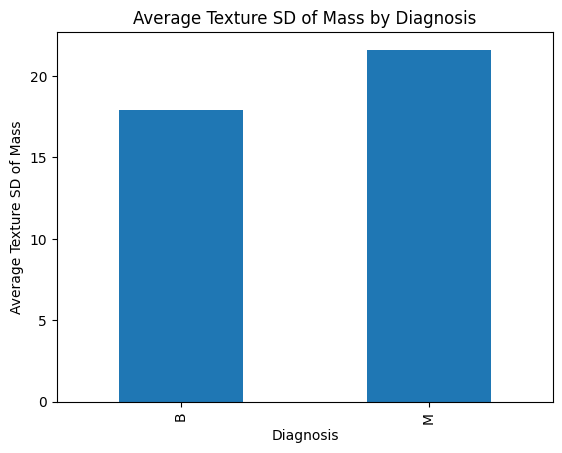

In [12]:
df.groupby('diagnosis')['texture_mean'].mean().plot(kind='bar')
plt.title("Average Texture SD of Mass by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Average Texture SD of Mass")
plt.show()

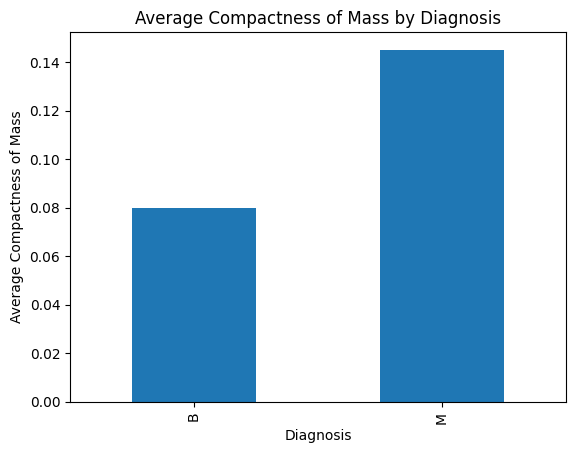

In [13]:
df.groupby('diagnosis')['compactness_mean'].mean().plot(kind='bar')
plt.title("Average Compactness of Mass by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Average Compactness of Mass")
plt.show()

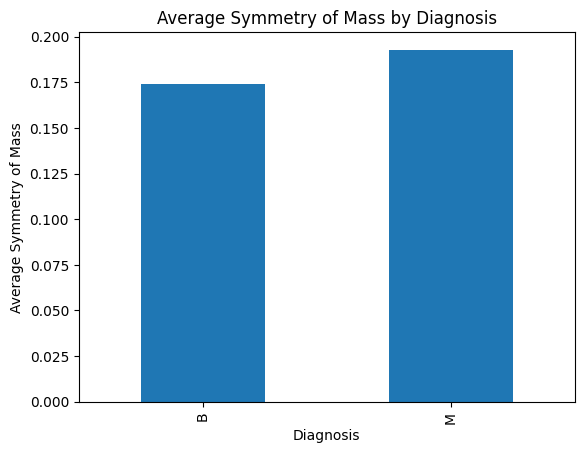

In [14]:
df.groupby('diagnosis')['symmetry_mean'].mean().plot(kind='bar')
plt.title("Average Symmetry of Mass by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Average Symmetry of Mass")
plt.show()

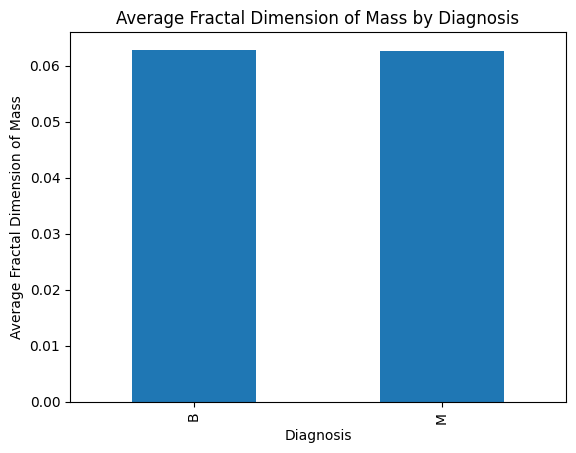

In [15]:
df.groupby('diagnosis')['fractal_dimension_mean'].mean().plot(kind='bar')
plt.title("Average Fractal Dimension of Mass by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Average Fractal Dimension of Mass")
plt.show()

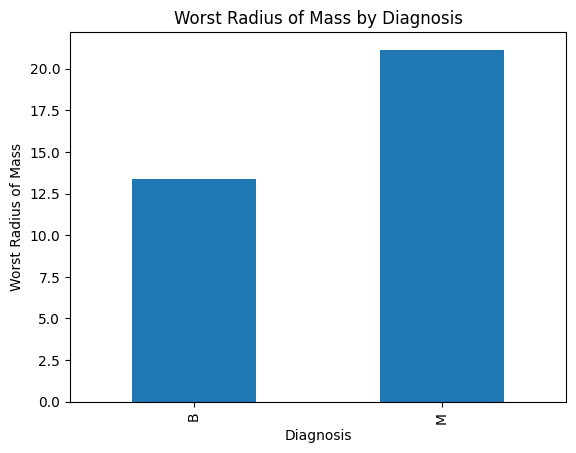

In [16]:
df.groupby('diagnosis')['radius_worst'].mean().plot(kind='bar')
plt.title("Worst Radius of Mass by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Worst Radius of Mass")
plt.show()

##Step 2: Data Cleaning

Clean columns, and encode categorical values

In [17]:
if 'id' in df.columns:
  df.drop(columns=['id'], inplace=True)   # drop 'id' column because we dont need it

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})   # encode categorical value

Clean data and then recalculate z-scores. If z-score is above 0.5, then check number of outliers.

In [18]:
# Drop rows with missing values before calculating Z-scores
df_clean = df.dropna()

# Recalculate Z-scores after cleaning the data
z_scores_clean = np.abs(stats.zscore(df_clean.select_dtypes(include=['float64', 'int64'])))

# Detect outliers using a threshold of 2
outliers_clean_test = (z_scores_clean > 2).sum()

# Output the number of outliers detected with the new threshold
print(f"Outliers detected (threshold=0.5):\n{outliers_clean_test}")

Outliers detected (threshold=0.5):
0


No outliers detected --> no more preprocessing needed.

In [19]:
corr_matrix = df.corr()

corr_matrix["diagnosis"].sort_values(ascending=False).head(10)


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


## Step 3: Feature Engineering

In [20]:
# group size related features
size_features = ["radius_mean", "perimeter_mean", "area_mean",
                 "radius_worst", "perimeter_worst", "area_worst"]
df["size_score"] = df[size_features].mean(axis=1)

# group shape related features
shape_features = ["smoothness_mean", "compactness_mean", "concavity_mean",
                  "symmetry_mean", "fractal_dimension_mean",
                  "smoothness_worst", "compactness_worst", "concavity_worst",
                  "symmetry_worst", "fractal_dimension_worst"]
df["shape_texture_score"] = df[shape_features].mean(axis=1)


The 30 features were combined into 3 simple summary features for easier analysis. size_score represents overall tumor size using radius, area, and perimeter values. shape_texture_score measures how irregular or smooth the tumor cells are.

##Model Development Report

###**Model Selection**:


1.   Logistic Regression - Since the dataset has numeric values and a classification prediction, it makes sense to go with a Logistic Regression. It's a simple model and does pretty well with numeric datasets.
2.   Linear Regression - It is similar to Logistic Regression, but its outputs aren't just limited to 0 or 1, hence it isn't ideal for classification problems.
3.   Artificial Neural Network - It captures non-linear patterns really well, but it tends to overfit and may not work best in a smaller dataset like this one.
4.   Convolutional Neural Network - It is best for images or spacial data and not so much for numeric datasets such as this one.

In [21]:
X = df[["size_score", "shape_texture_score", "radius_mean", "radius_worst"]]
y = df["diagnosis"]

# split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train logistic regresison model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# test model
y_pred = lr.predict(X_test)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# roc auc
scores = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# print metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nROC curve AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# cross-validation
scores = cross_val_score(lr, X, y, cv=4)
print("Cross-validation scores:", scores)

Confusion Matrix:
 [[71  0]
 [ 2 41]]

Accuracy: 0.9824561403508771

ROC curve AUC: 0.99737962659679

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Cross-validation scores: [0.8951049  0.93661972 0.94366197 0.92253521]


###**Model Training Process**:
- Features: size_score, shape_texture_score, radius_mean, radius_worst. These features were the ones that seemed to boost the accuracy and other metrics the most, so I chose to use them to train the logistic regression model.
- 80/20 training-test split
- Metrics for Evaluation: confusion matrix, ROC curve AUC, accuracy, precision, recall, and f1-score.
- Cross-Validation: Cross validated across 4 folds. The accuracies do not vary a lot, with the lowest being 0.895 and the highest being 0.944. This shows that the model is not predicting outcomes randomly and that it isn't overfitting or underfitting.

###**Model Evaluation**:
- Confusion Matrix: This shows the True Positives, False Positives, False Negatives, and True Negatives when the model tries to classify the test data. We can see that most of the data from the test set is classified as TP or TN, meaning that the model evaluated them correctly.
- ROC curve AUC: The ROC curve shows the trade-off between the true positive rate and false positive rate across different thresholds. The AUC value is 0.997 which is very close to 1, showing that the model is able to distinguish between malignant and benign cases pretty well.
- Accuracy: The accuracy is the rate of correct classifications the model does, which is 0.982 in this case. This is a good number and shows thast model is able to classify benign and malignant cases correctly 98% of the time.
- Precision: This shows how many times the model classified something as malignant (1) when it was actually malignant. We got a weighted average score of 0.98 which is very high, this means there's lower false positive classifications.
- Recall: This is the proportion of correctly predicted positive instances out of all actual positive instances. If this is high, it means that we have lesser cases of false negatives, which is crucial in medical diagnoses. In this case, we got a weighted average score of 0.98 which is a pretty good score.
- F1-Score: This is the harmonic mean of precision and recall and is useful in cases where there is an imbalance between the class distribution like there is here. Our weighted average score here is 0.98, which shows that the model is doing well.

##Final Project Report

###**Second Model (Linear Regression)**:

In [22]:
# create and train linear regression model
lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_lin = lin.predict(X_test)

# convert predictions to binary using threshold 0.5
y_pred_class = (y_pred_lin > 0.5).astype(int)

# mse and r2
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# confusion matrix for classification interpretation
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:\n", conf_matrix)

# classification report for comparison with logistic regression
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# cross-validation
cv_scores = cross_val_score(lin, X, y, cv=4, scoring='r2')
print("Cross-validation R² scores:", cv_scores)

Mean Squared Error: 0.06462213706166094
R² Score: 0.7249167070902898

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Cross-validation R² scores: [0.58733676 0.70160851 0.68563409 0.63834614]


###**Model Training Process (Linear model)**:
- Features: Same as last time - size_score, shape_texture_score, radius_mean, radius_worst.
- 80/20 training-test split
- Since this is a linear model, it predicts continuous numeric values, which is not suited for classification purposes. Hence, I converted those numeric values to classes by using a threshold of 0.5 (val > 0.5 => class 1, val < 0.5 => class 2).
- Metrics for Evaluation: confusion matrix, Mean Squared Error, R-square, accuracy, precision, recall, and f1-score.
- Cross-Validation: Cross validated across 4 folds. The accuracies do not vary a lot, with the lowest being 0.587 and the highest being 0.702. This shows that the model is not predicting outcomes randomly and that it isn't overfitting or underfitting.

###**Final Model Performance Analysis:**

**Comparison:**

While both models produced similar test accuracy (around 0.97–0.98), their reliability differed significantly. Logistic regression showed stable cross-validation scores between 0.895 and 0.944, while linear regression’s scores ranged much lower, from 0.59 to 0.7, with an R-square of 0.725. This indicates that linear regression does not generalize as well and struggles to capture the underlying patterns, even if its surface-level metrics look similar. Overall, logistic regression is the more consistent and dependable choice for this classification task, which is why I had chosen that.

**Limitations of the Logistic Regression Model:**
- **Linear assumption**: The model assumes the data has a linear decision boundary, but if the boundary is non-linear, the model will not be able to classify as well as it did right now. It can potentially miss non-linear complex patterns in the data.
- **Sensitive to scaling**: If the data is not scaled properly, it will not be able to perform well and makes the predictions unstable.
- **Feature Engineering**: The model relies very heavily on the developer choosing the right features to use. If there are a lot of features, it becomes difficult to select the more important ones. Also, if the designer chooses wrong/bad features to train the model on, it will perform badly and will not give accurate results. So a lot of work needs to go into designing and choosing good features for a logistic (or linear) regression model.

###**Deployment Plans:**
Training data - [data.csv](https://drive.google.com/file/d/1UzQ3I05tlCCC65ZUAsGebjNNRR36BQnV/view?usp=drive_link)


For deployment, I plan to create a simple pipeline that allows a user to input the four required feature values (size_score, shape_texture_score, radius_mean, radius_worst), which will then pass through the same data preprocessing steps used during training before the model returns a prediction class. Although I have not built a mock deployment yet, the goal is to simulate how the model would behave in a real setting by demonstrating how a sample input would move through the pipeline and produce an output.

The deployment will also include considerations for scalability, monitoring, and compliance. In a real system, I would track model performance over time, watch for data drift, and ensure patient information is handled securely and in line with healthcare regulations.

In the future, this system could be expanded by allowing users to upload actual raw medical images instead of numeric measurements from those images. A different machine learning model (like a CNN) could automatically extract the necessary features from the images, and feed them directly into the prediction pipeline and making the tool more easier to use and more realistic in hospitals.

###**Ethical Considerations:**


This particular project can have serious implications since it uses machine learning to predict a very serious medical diagnosis - predicting whether a tumor is malignant or benign. This is something that can be the difference between life and death for a patient. A false positive can cause a lot of unnecessary stress, whereas a false negative can delay possible treatment options. Thus, this model needs to either be 100% accurate all the time, or needs to constantly be checked by humans.

Recommendations:

- **Fairness**: We need to make sure that the model works properly across all demographic groups. We should test the model and retrain if performance gaps appear.

- **Accountability**: Keep clear logs of predictions, versions of the model, and data used for training. We should make sure that clinicians remain the ultimate decision-makers regarding these predictions.

- **Privacy and Compliance with Regulations**: We should follow HIPAA guidelines for data storage and anonymization, limit access to sensitive data, and document all preprocessing steps to make sure patient data isn't being leaked anywhere.

- **Monitoring and Maintenance**: Model performance should be continually monitored for any changes or anomalies, especially as new patient data becomes available. We should update or retrain the model when needed to maintain accuracy.